#### Imports

In [1]:
from keyence_analysis import QualityPrediction
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import math

In [2]:
from database.data_importer import DataManagement
dm = DataManagement()
df = dm.db_query('select * from file_relations r inner join file_concepts c on r.file_id || ".xes.yaml" = c.file ')

In [3]:
df

file_id  \
0     c6d36a21-7986-4717-8ae8-97e2286c65fa   
1     c7629084-13b9-4836-872b-52a1360a8145   
2     ef70f227-5e6e-487d-bd12-acf0a36fd2da   
3     c9729756-8631-4469-a5b9-82a11f7f1bc7   
4     4dfcfa9c-57e8-44b9-8595-3b6aba6f3ab7   
...                                    ...   
1300  43dd0121-eaed-4678-b716-3a5ee22c482e   
1301  281842a3-517f-4698-9279-bbefce5521b2   
1302  2abc3b35-f8b9-429a-b033-8bd7679854fe   
1303  61e083d8-f617-4b87-887b-024bfb27506b   
1304  3e0477c1-6e06-48ad-a7e8-1103ca76f3b9   

                                 parent_id batch  \
0     be48090f-5fe8-439b-b200-3ddb76b44fc2     7   
1     be48090f-5fe8-439b-b200-3ddb76b44fc2     7   
2     c25a5b04-afbb-4e62-a38e-b523b95ec204     7   
3     366ace20-ff87-4d6a-ac89-2f73321ee794     7   
4     366ace20-ff87-4d6a-ac89-2f73321ee794     7   
...                                    ...   ...   
1300  95c263e0-8851-4754-9dae-4c3944d131c2     9   
1301  02e00675-9667-403c-ad47-28d8b32016f9     9   
1302  02e00675-9667-403c-ad47-28d8b32016f9     9   
1303  7eb468e3-22bc-4eb4-85dc-6659a5a08e2c     9   
1304  7eb468e3-22bc-4eb4-85dc-6659a5a08e2c     9   

                                               file concept_number  \
0     c6d36a21-7986-4717-8ae8-97e2286c65fa.xes.yaml             57   
1     c7629084-13b9-4836-872b-52a1360a8145.xes.yaml             72   
2     ef70f227-5e6e-487d-bd12-acf0a36fd2da.xes.yaml            157   
3     c9729756-8631-4469-a5b9-82a11f7f1bc7.xes.yaml            317   
4     4dfcfa9c-57e8-44b9-8595-3b6aba6f3ab7.xes.yaml            327   
...                                             ...            ...   
1300  43dd0121-eaed-4678-b716-3a5ee22c482e.xes.yaml            932   
1301  281842a3-517f-4698-9279-bbefce5521b2.xes.yaml           1091   
1302  2abc3b35-f8b9-429a-b033-8bd7679854fe.xes.yaml           1092   
1303  61e083d8-f617-4b87-887b-024bfb27506b.xes.yaml           1207   
1304  3e0477c1-6e06-48ad-a7e8-1103ca76f3b9.xes.yaml           1208   

                    concept_name batch  
0           Turm Turn Production     7  
1       Turm Keyence Measurement     7  
2         Turm Keyence Measuring     7  
3           Turm Turn Production     7  
4       Turm Keyence Measurement     7  
...                          ...   ...  
1300               MT45 NC Start     9  
1301          IRB2600 Take to GS     9  
1302  IRB2600 IRB2600 GS to Door     9  
1303          IRB2600 Take to GS     9  
1304  IRB2600 IRB2600 GS to Door     9  

[1305 rows x 7 columns]

In [34]:
from database.data_importer import DataManagement
dm = DataManagement()
df = dm.get_measurements();
df

name                              instance   value         type  \
0       1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  active        state   
1       1506  f7b10faa-6e79-4444-929d-40e3fc74cdce   77.72  measurement   
2       1506  f7b10faa-6e79-4444-929d-40e3fc74cdce   77.71  measurement   
3       1506  f7b10faa-6e79-4444-929d-40e3fc74cdce    77.7  measurement   
4       1506  f7b10faa-6e79-4444-929d-40e3fc74cdce   77.69  measurement   
...      ...                                   ...     ...          ...   
102561  1328  4664b149-4f17-446f-a466-e2c0de3aac54    22.5  measurement   
102562  1328  4664b149-4f17-446f-a466-e2c0de3aac54   21.57  measurement   
102563  1328  4664b149-4f17-446f-a466-e2c0de3aac54   20.71  measurement   
102564  1328  4664b149-4f17-446f-a466-e2c0de3aac54   19.77  measurement   
102565  1328  4664b149-4f17-446f-a466-e2c0de3aac54  999.99  measurement   

        log_order                      timestamp batch  
0               0  2020-11-03T18:48:43.060+01:00    10  
1               1  2020-11-03T18:48:43.062+01:00    10  
2               2  2020-11-03T18:48:43.085+01:00    10  
3               3  2020-11-03T18:48:43.139+01:00    10  
4               4  2020-11-03T18:48:43.178+01:00    10  
...           ...                            ...   ...  
102561       1838  2020-07-22T18:26:26.122+02:00     9  
102562       1839  2020-07-22T18:26:26.125+02:00     9  
102563       1840  2020-07-22T18:26:26.128+02:00     9  
102564       1841  2020-07-22T18:26:26.131+02:00     9  
102565       1842  2020-07-22T18:26:26.150+02:00     9  

[102566 rows x 7 columns]

#### Constants and functions

In [3]:
def plot_sns(df, x, y, legend=False, rotate_ticks=90, line=False, hue=None, fig=(14,4), colors=None):
    f, ax= plt.subplots(1, 1, sharey=True, figsize=fig)
    if line:
        g = sns.lineplot(data=df, x=x, y=y, hue=hue, ax=ax).get_legend();
    else:
        if colors is not None:
            g = sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=ax, palette=colors).get_legend();
        else:
            g = sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=ax).get_legend();
    if hue is not None and not legend:
        g.set_visible(False)
        
    plt.xticks(rotation=90);
    return g

## Data Import and Visualization

In [5]:
# Importing dataset
p = QualityPrediction()
df = p.read_values()

name                              instance  value         type  log_order  \
1  307  9b4a5166-f984-4e98-a0d6-1bd70878b975  22.10  measurement          1   
2  307  9b4a5166-f984-4e98-a0d6-1bd70878b975  22.11  measurement          2   
3  307  9b4a5166-f984-4e98-a0d6-1bd70878b975  22.12  measurement          3   

                timestamp batch                                Parent m_name  \
1 2020-07-22 12:11:36.493     7  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc    278   
2 2020-07-22 12:11:36.496     7  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc    278   
3 2020-07-22 12:11:36.505     7  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc    278   

                             m_instance upright_value lying_value  \
1  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc          True       False   
2  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc          True       False   
3  e96864ce-81d4-4f87-8fd3-a1a4c746e8cc          True       False   

                                              m_file  
1  data/batch07_bus/e96864ce-81d4-4f87-8fd3-a1a4c...  
2  data/batch07_bus/e96864ce-81d4-4f87-8fd3-a1a4c...  
3  data/batch07_bus/e96864ce-81d4-4f87-8fd3-a1a4c...

In [37]:
df = df.query('(type == "measurement")')# and (batch == "10")') 
df = df.astype({'value': 'float64'})#, 'timestamp':'datetime64'})
df.timestamp = pd.to_datetime(df.timestamp, errors='ignore', utc=True)
df = df.query('value < 999')
#df[['data','batch', 'file']] = df.batch.str.split("/",expand=True,)
#df['batch'] = df.batch.str.replace("batch0", "")
#df['batch'] = df.batch.str.replace("_bus", "")
#df.drop(['data', 'file'], inplace=True, axis=1)
df_raw = df
df.head(3)

name                              instance  value         type  log_order  \
1  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  77.72  measurement          1   
2  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  77.71  measurement          2   
3  1506  f7b10faa-6e79-4444-929d-40e3fc74cdce  77.70  measurement          3   

                         timestamp batch  
1 2020-11-03 17:48:43.062000+00:00    10  
2 2020-11-03 17:48:43.085000+00:00    10  
3 2020-11-03 17:48:43.139000+00:00    10

___

## Data preparation  
### Time discretization

__Problem__: The timestamps are not standardized

__Idea__: Group the timestamp in fixed intervals of time

In [38]:
df = df_raw
# Group the data in buckets of 100 miliseconds with the mean of measurements
print("Database length before discretization: ", len(df))

# S- seconds | L: miliseconds | U: microseconds | N: nanoseconds
df = df[['timestamp', 'name', 'value']].groupby(pd.Grouper(key='timestamp', freq='200L')).agg({'name': 'first','value':'median'})
df[['name']] = df.fillna(method='ffill')[['name']]
#df = df.fillna(method='ffill')
df = df.reset_index()

print("Database length after discretization: ", len(df))
df

Database length before discretization:  102362
Database length after discretization:  45048188


timestamp  name   value
0        2020-07-22 11:24:11.200000+00:00    35  19.220
1        2020-07-22 11:24:11.400000+00:00    35     NaN
2        2020-07-22 11:24:11.600000+00:00    35  22.085
3        2020-07-22 11:24:11.800000+00:00    35  22.170
4               2020-07-22 11:24:12+00:00    35  22.250
...                                   ...   ...     ...
45048183 2020-11-03 18:04:47.800000+00:00  1585  22.020
45048184        2020-11-03 18:04:48+00:00  1585     NaN
45048185 2020-11-03 18:04:48.200000+00:00  1585     NaN
45048186 2020-11-03 18:04:48.400000+00:00  1585  22.000
45048187 2020-11-03 18:04:48.600000+00:00  1585  21.950

[45048188 rows x 3 columns]

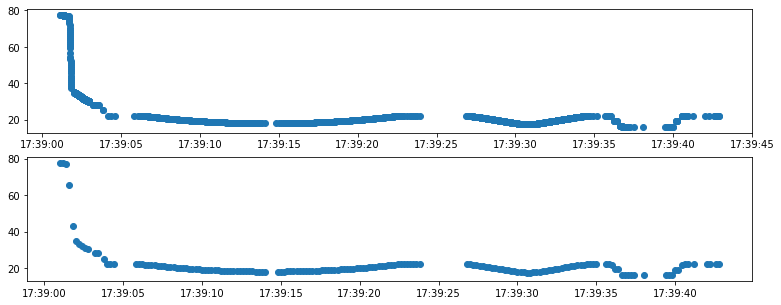

In [39]:
# Plotting before and after
target = '1446'
before = df_raw.query("name == @target")
after = df.query("name == @target")

f, ax= plt.subplots(2, 1, sharey=True, figsize=(13,5))
ax[0].scatter(before['timestamp'],before['value'])
ax[1].scatter(after['timestamp'],after['value'])
plt.show()
del before, after

### Time indexing

__Problem__: The timestamps are better distributed, but it is still not possible to plot all data together, because the measurements were not done at the same initial time

__Idea__: Indexing the time for each of the files, so they can be plotted together, providing better intuition

KeyboardInterrupt: 

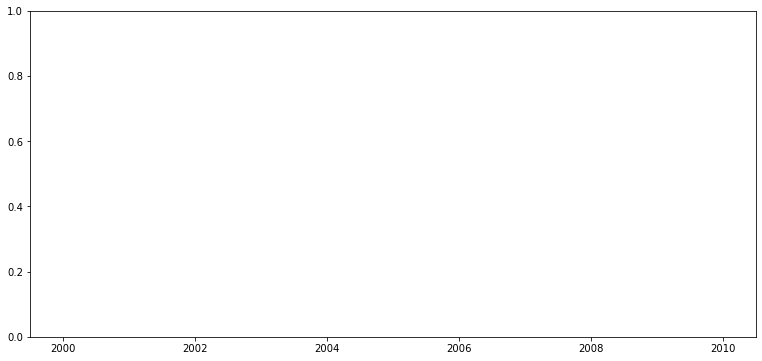

In [40]:
# Plotting pieces without time ordering
f, ax= plt.subplots(1, 1, sharey=True, sharex=False, figsize=(13,6))
plt.plot(df['timestamp'],df['value']);
plt.show()

In [27]:
# Groupping by the file concept and creating an index based on the chunked time
df = df.set_index(df.groupby('name').cumcount(), append=True).reset_index()
df = df.rename(columns={'level_1': 'time_index'})
df.drop(['level_0'], inplace=True, axis=1)
df.head(3)

time_index               timestamp  name  value
0           0 2020-11-03 17:39:01.000  1446  77.71
1           1 2020-11-03 17:39:01.200  1446  77.47
2           2 2020-11-03 17:39:01.400  1446  76.93

#### Demonstrating equivalence between timestamp and time index

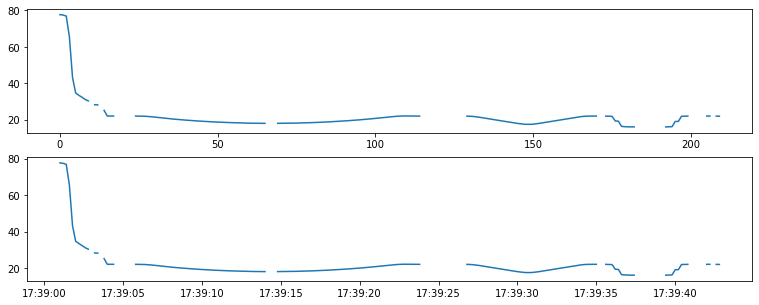

In [29]:
f, ax= plt.subplots(2, 1, sharey=True, figsize=(13,5))
sample = df.query("name == '1446'")

ax[0].plot(sample['time_index'],sample['value'])
ax[1].plot(sample['timestamp'],sample['value'])
plt.show()
del sample

#### Plotting all data together with indexed time

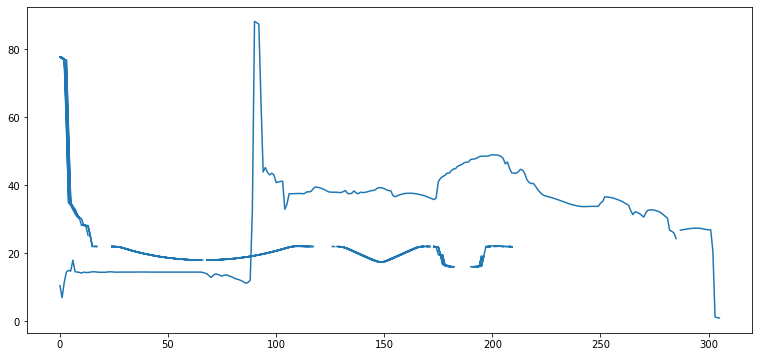

In [30]:
# Plotting pieces with time ordering
f, ax= plt.subplots(1, 1, sharey=True, sharex=False, figsize=(13,6))
plt.plot(df['time_index'],df['value']);
plt.show()

____

## Previous assignment

In [32]:
# file level - central tendency measures
df_cluster = df[['name', 'value']].groupby(['name']).mean()
df_cluster['min'] = df[['name', 'value']].groupby(['name']).min()
df_cluster['max'] = df[['name', 'value']].groupby(['name']).max()
df_cluster['median'] = df[['name', 'value']].groupby(['name']).median()
df_cluster['count'] = df[['name', 'value']].groupby(['name']).count()
df_cluster['std'] = df[['name', 'value']].groupby(['name']).std() 
df_cluster['var'] = df[['name', 'value']].groupby(['name']).var() 
#df_cluster['batch'] = df[['name', 'batch']].groupby(['name']).first() 
df_cluster = df_cluster.reset_index()
df_cluster.head()

name      value    min     max   median  count        std         var
0  1446  21.672000  16.05  77.710  19.8625    170   8.910993   79.405798
1  1474  30.921590   1.00  88.170  34.9050    305  13.492379  182.044288
2  1506  21.575514  16.05  77.705  19.8850    175   8.466271   71.677749
3  1536  21.508966  16.05  77.680  19.8450    174   8.512443   72.461685
4  1566  21.951096  16.06  77.720  20.0700    178   9.325524   86.965406

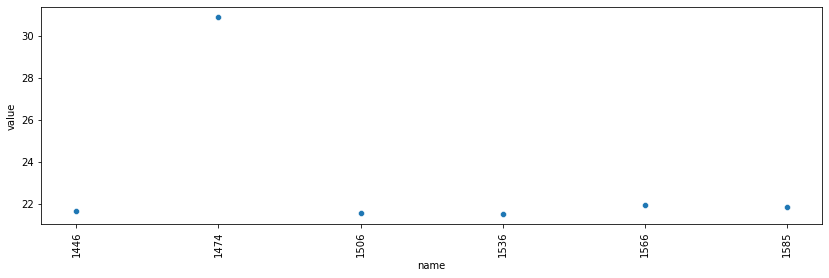

In [33]:
plot_sns(df_cluster, 'name', 'value');

### Measurements range 

In [14]:
plot_sns(df, 'name', 'value');

### Measurements 

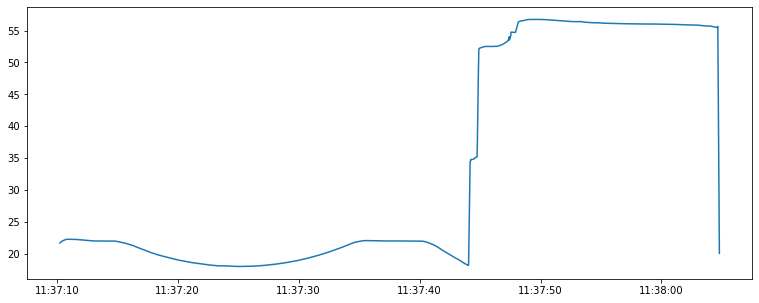

In [146]:
f, ax= plt.subplots(1, 1, sharey=True, figsize=(13,5))
n_df = df.query("name == '128'")
ax.plot(n_df['timestamp'],n_df['value'])

plt.show()

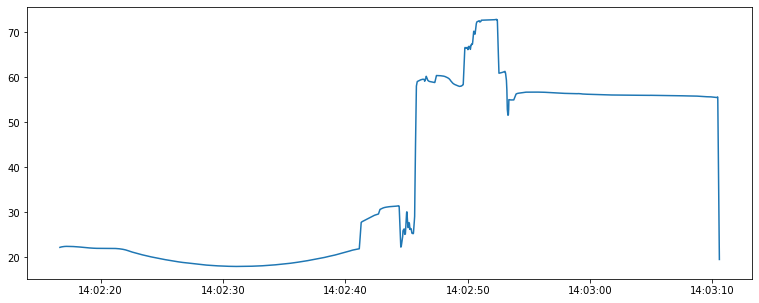

In [143]:
f, ax= plt.subplots(1, 1, sharey=True, figsize=(13,5))
n_df = df.query("name == '784'")
ax.plot(n_df['timestamp'],n_df['value'])
plt.show()

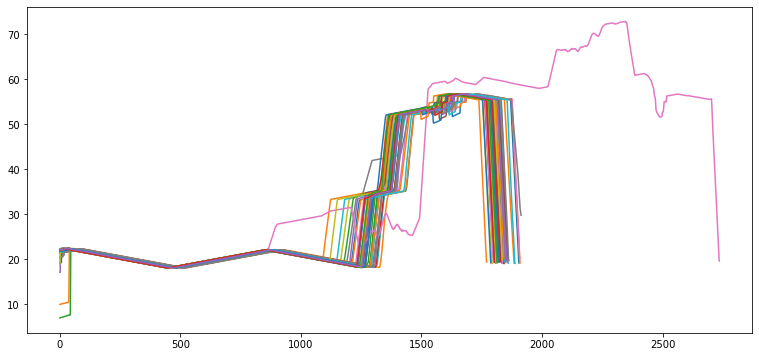

In [157]:
f, ax= plt.subplots(1, 1, sharey=True, figsize=(13,6))
n_names =  df_cluster[['name']].to_numpy()

for name in n_names:
    target = name[0]
    n_df = df.query("name == @target")
    ax.plot(n_df['log_order'],n_df['value'], label=target)

plt.show()

----

## Batch Stats

#### Comparing rook smallest value (from curvy part)

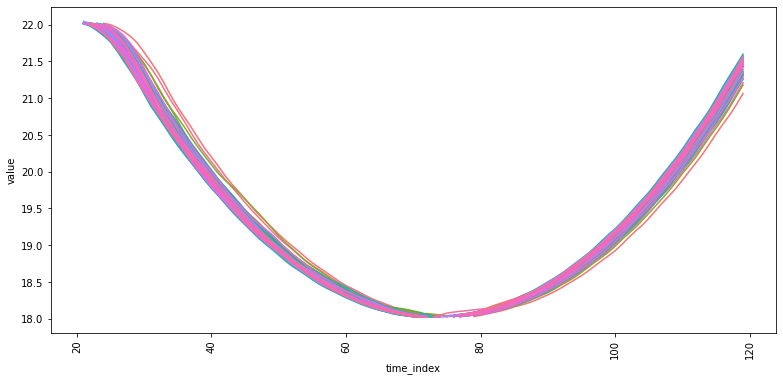

In [12]:
plot_sns(df.query("(time_index > 20) and (time_index < 120)"), 'time_index', 'value', hue='name', line=True, fig=(13,6));

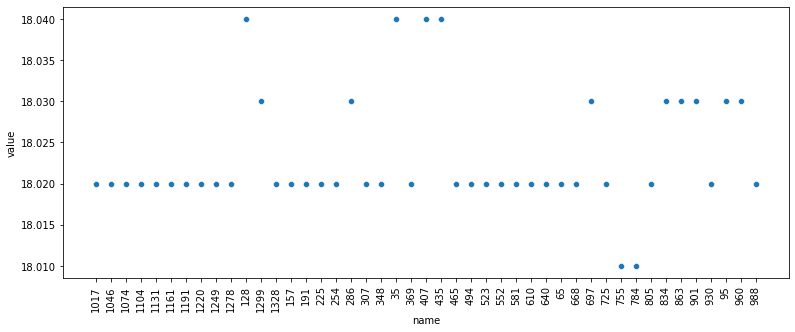

In [24]:
sample = df.query("(time_index > 20) and (time_index < 120)").groupby(
    'name', as_index=False).min()
plot_sns(sample, 'name', 'value', line=False, fig=(13,5));

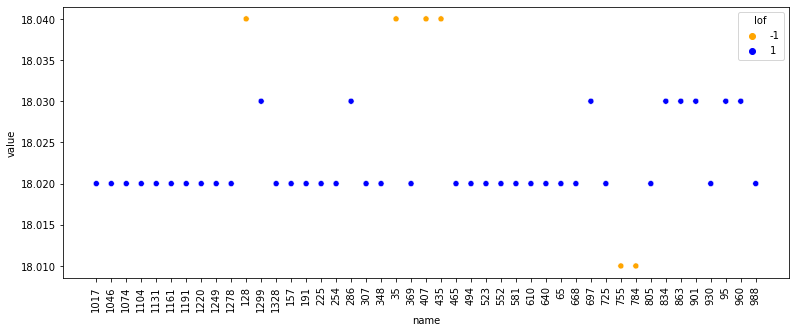

In [22]:
# Detecting outliers based on kmeans centers
clf_min = LocalOutlierFactor(n_neighbors=4)
sample['lof'] = clf_min.fit_predict(sample[['value']])
plot_sns(sample, 'name', 'value', hue='lof', legend=True, fig=(13,5), colors=['orange','blue']);

In [149]:
# Min measure outliers: 
min_measure_outliers = sample.query('lof == -1')
smean = sample[['value']].mean().to_numpy()[0]
print("Data value mean: ", smean)
print("Occurrence:", len(min_measure_outliers), '/', len(sample), '=', len(min_measure_outliers)/len(sample))
min_measure_outliers['mean_difference'] = (min_measure_outliers['value'] - smean)
min_measure_outliers


Data value mean:  18.023111111111103
Occurrence: 6 / 45 = 0.13333333333333333


name  value batch  lof  mean_difference
10  128  18.04     7   -1         0.016889
20   35  18.04     7   -1         0.016889
22  407  18.04     8   -1         0.016889
23  435  18.04     8   -1         0.016889
35  755  18.01     8   -1        -0.013111
36  784  18.01     8   -1        -0.013111

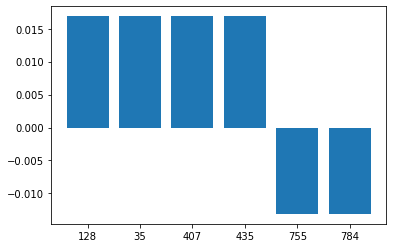

In [153]:
plt.bar(min_measure_outliers['name'], min_measure_outliers['mean_difference'])
plt.show()

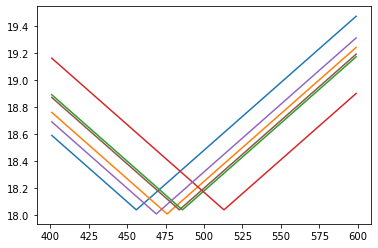

In [120]:
non_outlier = sample#.query('lof == -1')
n_names = set(non_outlier[['name']].to_numpy().flatten())
df_min = df.query("(log_order > 400) and (log_order < 600)")
for name in n_names:
    target = name
    t_df = df_min.query("name == @target")
    plt.plot(t_df['log_order'], t_df['value'], label=target)
#plt.legend()
plt.show()

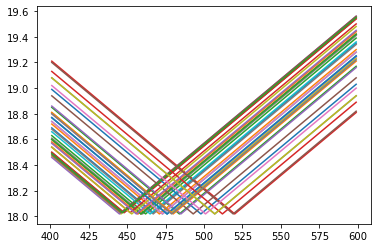

In [122]:
outlier_ = sample.query('lof == 1')
n_names = set(outlier_[['name']].to_numpy().flatten())
df_min = df.query("(log_order > 400) and (log_order < 600)")
for name in n_names:
    target = name
    t_df = df_min.query("name == @target")
    plt.plot(t_df['log_order'], t_df['value'], label=target)
#plt.legend()
plt.show()

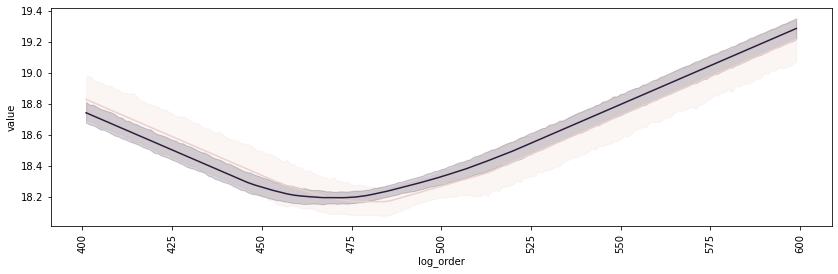

In [130]:
non_outlier = sample#.query('lof == -1')
n_names = set(non_outlier[['name']].to_numpy().flatten())
df_min = df.query("(log_order > 400) and (log_order < 600)")
joined = pd.DataFrame()
for name in n_names:
    target = name
    t_df = df_min.query("name == @target")
    t_df['lof'] = int(sample.query("name == @target")[['lof']].to_numpy().flatten())
    joined = joined.append(t_df)
    #plt.plot(t_df['log_order'], t_df['value'], label=t_df['lof'])
joined
plot_sns(joined, 'log_order', 'value', hue='lof', line=True)
#plt.legend()
#plt.show()

In [17]:
stats = sample[['batch', 'value']].groupby(['batch'], as_index=True).mean()
stats['mean'] = sample[['batch', 'value']].groupby(['batch'], as_index=True).mean()
stats['min'] = sample[['batch', 'value']].groupby(['batch'], as_index=True).min()
stats['max'] = sample[['batch', 'value']].groupby(['batch'], as_index=True).max()
stats['variance'] = sample[['batch', 'value']].groupby(['batch'], as_index=True).var()
stats['std dev'] = sample[['batch', 'value']].groupby(['batch'], as_index=True).std()
stats = stats.reset_index()
stats.drop('value', inplace=True, axis=1)
stats

batch       mean    min    max  variance   std dev
0     7  18.025000  18.02  18.04  0.000064  0.007977
1     8  18.022941  18.01  18.04  0.000072  0.008489
2     9  18.021875  18.02  18.03  0.000016  0.004031

## File Stats

In [102]:
full_df = p.read_values()
full_df = full_df.query('type == "measurement"') 
full_df = full_df.astype({'value': 'float64', 'timestamp':'datetime64'})
full_df[['data','batch', 'file']] = full_df.batch.str.split("/",expand=True,)
full_df['batch'] = full_df.batch.str.replace("batch0", "")
full_df['batch'] = full_df.batch.str.replace("_bus", "")
full_df.drop('data', inplace=True, axis=1)
full_df.drop('file', inplace=True, axis=1)

In [105]:
file_stats = full_df[['name', 'batch', 'value']].groupby(['name'], as_index=False).agg({'batch':'first', 'value':'mean'})
file_stats['mean'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'mean'})[['value']]
file_stats['second_max'] = full_df.query("value<999")[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'max'})[['value']]
file_stats['max'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'max'})[['value']]
file_stats['min'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'min'})[['value']]
file_stats['count'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'count'})[['value']]
file_stats['max_sort'] = full_df[['name', 'log_order']].groupby(['name'], as_index=False).max()[['log_order']]
file_stats['var'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'var'})[['value']]
file_stats['std'] = full_df[['name', 'value']].groupby(['name'], as_index=False).agg({'value':'std'})[['value']]
file_stats.drop('value', inplace=True, axis=1)
file_stats.sort_values(by=['name'])

name batch       mean  second_max     max    min  count  max_sort  \
0   1017     9  30.700782       56.75  999.99  18.02   1905      1905   
1   1046     9  30.770325       56.76  999.99  18.02   1910      1910   
2   1074     9  30.173400       56.75  999.99  18.02   1838      1838   
3   1104     9  30.243119       56.75  999.99  18.02   1808      1808   
4   1131     9  30.201728       56.74  999.99  18.02   1835      1835   
5   1161     9  30.348046       56.75  999.99  18.02   1827      1827   
6   1191     9  30.950016       56.74  999.99  18.02   1908      1908   
7   1220     9  32.467189       56.79  999.99  18.02   1914      1914   
8   1249     9  31.196398       56.74  999.99  18.02   1852      1852   
9   1278     9  31.399145       56.73  999.99  18.02   1859      1859   
10   128     7  30.085623       56.75  999.99  18.04   1846      1846   
11  1299     9  31.827069       56.72  999.99  18.03   1822      1822   
12  1328     9  31.177736       56.71  999.99  18.02   1842      1842   
13   157     7  29.997229       56.74  999.99  18.02   1801      1801   
14   191     7  30.645089       56.76  999.99  17.05   1802      1802   
15   225     7  29.961197       56.76  999.99  18.02   1830      1830   
16   254     7  29.841434       56.76  999.99  18.02   1799      1799   
17   286     7  29.946837       56.76  999.99  18.03   1815      1815   
18   307     7  29.900691       56.76  999.99  18.02   1795      1795   
19   348     7  29.787608       56.76  999.99  18.02   1860      1860   
20    35     7  30.545404       56.74  999.99  18.04   1819      1819   
21   369     7  29.789401       56.77  999.99  18.02   1885      1885   
22   407     8  30.286951       56.76  999.99   6.90   1843      1843   
23   435     8  29.686294       56.77  999.99  18.04   1843      1843   
24   465     8  29.929424       56.77  999.99  18.02   1858      1858   
25   494     8  30.586988       56.76  999.99  18.02   1806      1806   
26   523     8  29.901709       56.76  999.99  18.02   1837      1837   
27   552     8  29.980624       56.76  999.99  18.02   1858      1858   
28   581     8  30.312559       56.77  999.99  18.02   1809      1809   
29   610     8  29.948266       56.76  999.99  18.02   1845      1845   
30   640     8  30.224827       56.75  999.99  18.02   1788      1788   
31    65     7  30.142874       56.75  999.99   9.92   1844      1844   
32   668     8  30.020055       56.75  999.99  18.02   1824      1824   
33   697     8  30.353149       56.74  999.99  18.03   1804      1804   
34   725     8  30.579186       56.75  999.99  18.02   1855      1855   
35   755     8  30.250452       56.74  999.99  18.01   1860      1860   
36   784     8  40.844795       72.89  999.99  18.01   2736      2736   
37   805     8  30.487654       56.73  999.99  18.02   1863      1863   
38   834     8  31.991231       56.73  999.99  18.03   1836      1836   
39   863     8  30.438920       56.72  999.99  18.03   1889      1889   
40   901     9  29.821338       56.72  999.99  18.03   1823      1823   
41   930     9  29.640271       56.74  999.99  18.02   1771      1771   
42    95     7  30.370948       56.75  999.99  18.03   1815      1815   
43   960     9  30.201592       56.75  999.99  18.03   1828      1828   
44   988     9  30.284600       56.74  999.99  18.02   1850      1850   

            var        std  
0   1184.879432  34.422078  
1   1184.368147  34.414650  
2   1232.651318  35.109134  
3   1253.831005  35.409476  
4   1237.595468  35.179475  
5   1244.717417  35.280553  
6   1194.802341  34.565913  
7   1687.792832  41.082756  
8   1222.196201  34.959923  
9   1216.746133  34.881888  
10  1229.065380  35.058029  
11  1238.926542  35.198388  
12  1232.679370  35.109534  
13  1253.514999  35.405014  
14  1777.096990  42.155628  
15  1237.736563  35.181480  
16  1252.257137  35.387245  
17  1244.182933  35.272977  
18  1255.481935  35.432781  
19  1217.974782  34.899495  
20  1759.656261  41.948257  
21  120

---

## Clustering / Outlier Detection

### K-Means

Cluster the files based on the measurements mean and the standard deviation 

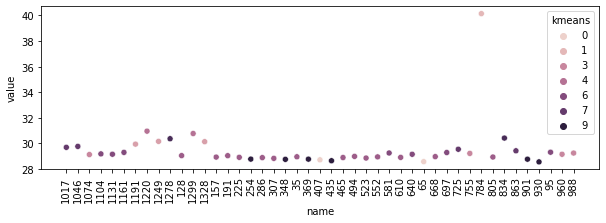

In [82]:
# Clustering - find weird behavior in files
kmeans = KMeans(n_clusters=10).fit(df_cluster[['value','std']])
df_cluster['kmeans'] = kmeans.labels_
plot_sns(df_cluster, x="name", y="value", hue="kmeans", fig=(10,3), legend=True)
plt.show()

#### Using K-Means to cluster the measures in clusters, so the files are comparable in between themselves (since each file has a different number of measurements)

In [66]:
# clustering values for each file 
df_f = df.query("(log_order > 70) and (log_order < 1500)")
# get unique file names 
df_filter = df.query("(log_order > 70) and (log_order < 1600)")
files = set(df[['name']].to_numpy().flatten())
dfs = []

df_clust = pd.DataFrame()

# apply kmeans to each file
for name in files:
    df_file = df_f.query("name==@name")
    kmeans = KMeans(n_clusters=30).fit(df_file[['value']])
    k_labels = kmeans.labels_
    k_centers = kmeans.cluster_centers_.flatten()
    df_file['km_label'] = k_labels
    df_file['km_center'] = k_centers[k_labels] # replacing values for its closest centroid
    # df_file_new = df_file[['km_center', 'name', 'log_order']].groupby(['km_center', 'name'], as_index=False).first()
    df_file_new = df_file[['km_center', 'name', 'log_order', 'timestamp' , 'km_label']] \
        .groupby(['km_center', 'name'], as_index=False) \
        .agg({'log_order':'first', 'km_label':'first' , 'timestamp': lambda x: x.max() - x.min()})
    
    df_clust = df_clust.append(df_file_new, ignore_index=True)

df_clust['zero'] = 0   

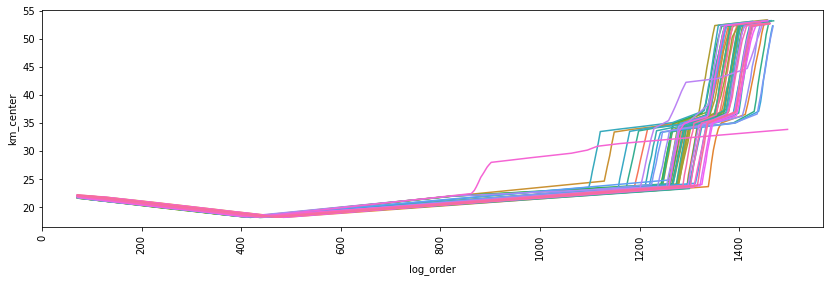

In [67]:
plot_sns(df_clust, 'log_order', 'km_center', hue='name', line=True);

### Applying LocalOutlierFactor based on the k-means centers 

Based on the values for log_order (timestamp order), clusters centers and variance of each file

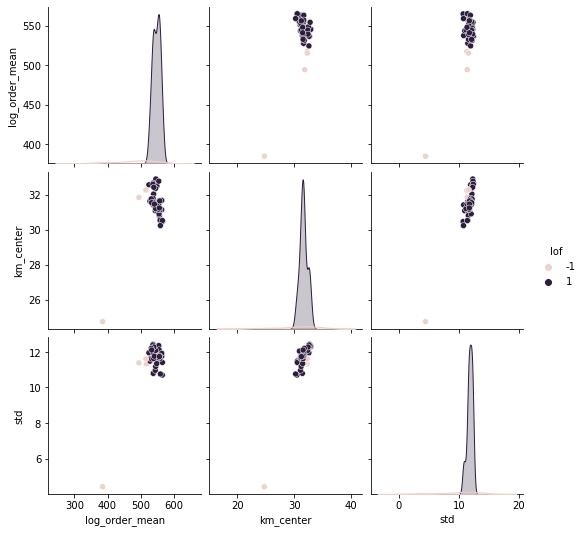

In [68]:
# Detecting outliers based on kmeans centers
clf_k = LocalOutlierFactor(n_neighbors=4)
df_out = df_clust[['log_order', 'km_center', 'name']].groupby(["name"]).agg({'log_order':'first', 'km_center':'mean'})
df_out
df_out['std'] = df_clust[['log_order',  'km_center', 'name']].groupby("name").std()[['km_center']]
df_out['log_order_mean'] = df_clust[['log_order', 'name']].groupby("name").std()[['log_order']]

df_out['lof'] = clf_k.fit_predict(df_out[['log_order_mean', 'km_center', 'std']])
g = sns.pairplot(data=df_out[['log_order_mean', 'km_center', 'std', 'lof']], hue='lof')#, x="log_order", y="km_center",  hue='lof', ax=ax)
#plt.show()
#plot_sns(df_out, 'log_order', 'km_center', hue='lof')

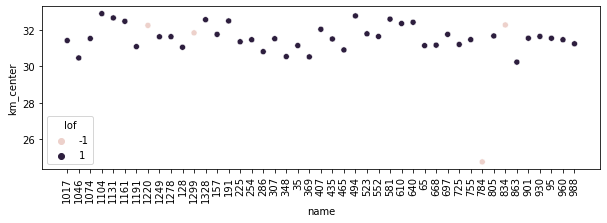

In [69]:
plot_sns(df_out, x="name", y="km_center", hue="lof", fig=(10,3), legend=True)

In [70]:
df_out.query("lof != -1").reset_index().head()

name  log_order  km_center        std  log_order_mean  lof
0  1017        430  31.423988  10.793181      537.353344    1
1  1046        442  30.468312  10.701656      564.689401    1
2  1074        435  31.536266  11.904884      551.846593    1
3  1104        424  32.904217  12.312305      545.151251    1
4  1131        440  32.668437  12.434254      536.375856    1

In [71]:
outliers_lof = df_out.query("lof == -1")
outliers_lof = outliers_lof.reset_index()
outliers_lof

name  log_order  km_center        std  log_order_mean  lof
0  1220        435  32.256406  11.325513      517.216818   -1
1  1299        417  31.847761  11.388338      494.216826   -1
2   784        429  24.754253   4.410981      385.049153   -1
3   834        407  32.282368  11.605920      515.228820   -1

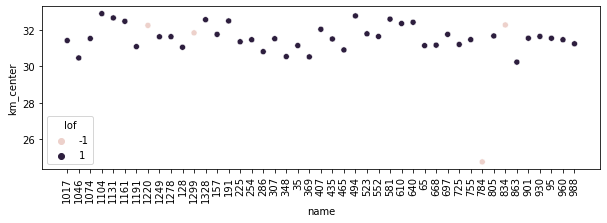

In [72]:
plot_sns(df_out, x="name", y="km_center", hue="lof", fig=(10,3), legend=True);

### Outlier detection

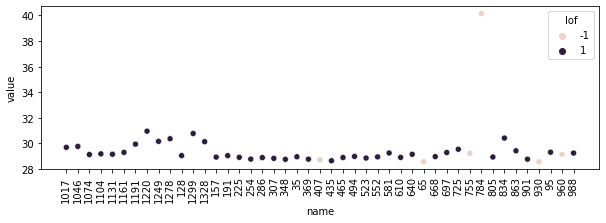

In [58]:
clf = LocalOutlierFactor(n_neighbors=5)
df_cluster['lof'] = clf.fit_predict(df_cluster[['value',  'std', 'median']])
plot_sns(df_cluster, x="name", y="value", hue="lof", fig=(10,3), legend=True);

In [33]:
df

time_index               timestamp  name   value  lof
0               0 2020-07-22 11:24:11.200    35  19.220    1
1               1 2020-07-22 11:24:11.400    35  19.220    1
2               2 2020-07-22 11:24:11.600    35  22.085    1
3               3 2020-07-22 11:24:11.800    35  22.170    1
4               4 2020-07-22 11:24:12.000    35  22.250    1
...           ...                     ...   ...     ...  ...
90670         265 2020-07-22 16:26:25.200  1328  55.660   -1
90671         266 2020-07-22 16:26:25.400  1328  55.625    1
90672         267 2020-07-22 16:26:25.600  1328  55.560    1
90673         268 2020-07-22 16:26:25.800  1328  55.540    1
90674         269 2020-07-22 16:26:26.000  1328  37.710   -1

[90675 rows x 5 columns]

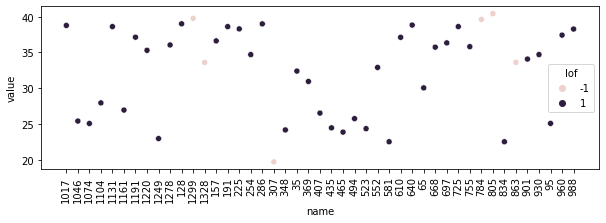

In [38]:
df_c = df[['value', 'name']].groupby(["name"]).mean()
df_c['std'] = df[['value', 'name']].groupby(["name"]).std()[['value']]
df_c['median'] = df[['value', 'name']].groupby(["name"]).median()[['value']]
#df_c
clf = LocalOutlierFactor(n_neighbors=5)
df_c['lof'] = clf.fit_predict(df_c[['value',  'std', 'median']])
plot_sns(df_c, x="name", y="value", hue="lof", fig=(10,3), legend=True);

In [39]:
# Showing the mean values without the outliers
df_c.query("(lof != -1)").head()

value       std  median  lof
name                                  
1017  38.757325  8.438949  40.240    1
1046  25.388868  7.969524  23.685    1
1074  25.049404  8.902512  22.825    1
1104  27.930035  8.335193  26.460    1
1131  38.593879  8.089124  39.915    1

In [40]:
# Showing outlierst statistics 
outliers = df_c.query("(lof == -1)")
outliers.head()

value        std  median  lof
name                                   
1299  39.750755   6.454999   40.63   -1
1328  33.583593  16.998293   22.02   -1
307   19.681458   4.440869   19.10   -1
784   39.601521   8.829957   39.95   -1
805   40.407120   6.205358   41.30   -1

### Plotting outliers that are present in all

In [83]:
# getting clusters with less points kmeans
kcount = df_cluster[['kmeans', 'value']].groupby('kmeans').count()[['value']]
kcount = kcount.sort_values(by=['value'])
kcount = kcount.reset_index()
print(kcount)
klist = kcount.head(2)[['kmeans']].to_numpy().flatten()
print(klist)

   kmeans  value
0       1      1
1       0      2
2       4      2
3       8      2
4       2      3
5       3      4
6       7      4
7       9      6
8       6      7
9       5     14
[1 0]


{'784'}
Name: 784  MinVal:  18.01  MaxVal:  72.89


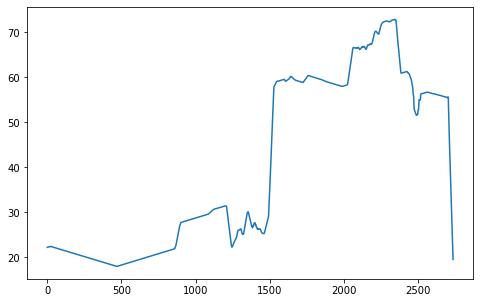

In [84]:
# intersetion
o_files1 = set(outliers[['name']].to_numpy().flatten())
o_files2 = set(outliers_lof['name'].to_numpy().flatten())
o_files3 = set(df_cluster.query("(kmeans == @klist[0]) or (kmeans == @klist[1])")['name'].to_numpy().flatten())
o_files = set.intersection(o_files1, o_files2, o_files3)

f, ax = plt.subplots(1, 1, sharey=True, figsize=(8,5))
print(o_files)
# Plot together
for name in o_files:
    target = name
    t_df = df.query("name == @target")
    print("Name:", target, " MinVal: ", t_df['value'].min(), " MaxVal: ", t_df['value'].max())
    plt.plot(t_df['log_order'], t_df['value'], label=target)
#plt.legend()
plt.show()

Name: 1220  MinVal:  18.02  MaxVal:  56.79
Name: 755  MinVal:  18.01  MaxVal:  56.74
Name: 1299  MinVal:  18.03  MaxVal:  56.72
Name: 784  MinVal:  18.01  MaxVal:  72.89
Name: 65  MinVal:  9.92  MaxVal:  56.75
Name: 960  MinVal:  18.03  MaxVal:  56.75
Name: 834  MinVal:  18.03  MaxVal:  56.73
Name: 407  MinVal:  6.9  MaxVal:  56.76
Name: 930  MinVal:  18.02  MaxVal:  56.74


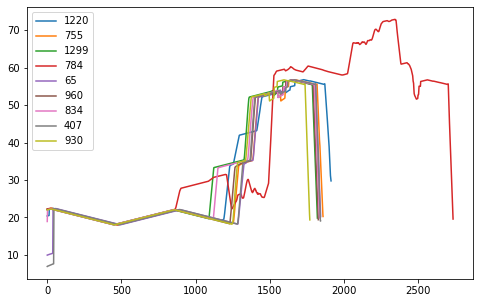

In [85]:
# Union
o_files1 = set(outliers[['name']].to_numpy().flatten())
o_files2 = set(outliers_lof['name'].to_numpy().flatten())
o_files3 = set(df_cluster.query("(kmeans == @klist[0]) or (kmeans == @klist[1])")['name'].to_numpy().flatten())
o_files = set.union(o_files1, o_files2, o_files3)

f, ax = plt.subplots(1, 1, sharey=True, figsize=(8,5))

# Plot together
for name in o_files:
    target = name
    t_df = df.query("name == @target")
    print("Name:", target, " MinVal: ", t_df['value'].min(), " MaxVal: ", t_df['value'].max())
    plt.plot(t_df['log_order'], t_df['value'], label=target)
plt.legend()
plt.show()

{'307', '35', '1328', '225', '369', '1074', '834', '901', '494', '640', '1131', '286', '988', '581', '960', '157', '697', '407', '1161', '1249', '863', '254', '523', '755', '725', '1104', '1299', '1278', '65', '1017', '465', '930', '1046', '1191', '1220', '95', '128', '435', '348', '191', '552', '784', '610', '668', '805'}
{'1220', '755', '1299', '784', '65', '960', '834', '407', '930'}
{'307', '35', '1328', '225', '369', '1074', '901', '494', '640', '1131', '286', '988', '581', '157', '697', '1161', '1249', '863', '254', '523', '725', '1104', '1278', '1017', '465', '1046', '1191', '95', '128', '435', '348', '191', '552', '610', '668', '805'}


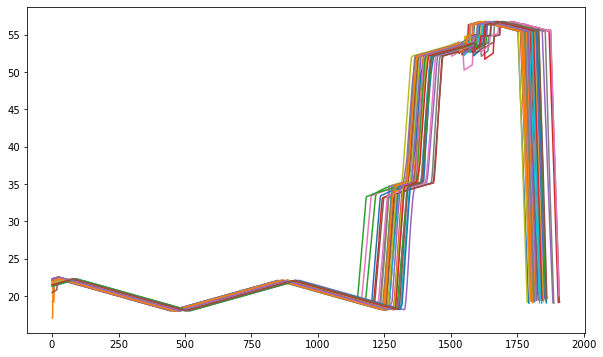

In [93]:
f, ax= plt.subplots(1, 1, sharey=True, figsize=(10,6))
n_names = set(df_cluster[['name']].to_numpy().flatten())
print(n_names)
print(o_files)
n_names = n_names - o_files
print(n_names)
for name in n_names:
    target = name
    n_df = df.query("name == @target")
    ax.plot(n_df['log_order'],n_df['value'], label=target)

plt.show()

#### Since the biggest variation on the outlier clustering is due to the robot hand, these could be used to calculate how much the robot or the ambient interferes in the measurements

In [88]:
files_count = len(df[['name']].groupby(['name']).count())
print("Occurence union", len(set.union(o_files1, o_files2, o_files3))/files_count)
print("Occurence intersect", len(set.intersection(o_files1, o_files2, o_files3))/files_count)

Occurence union 0.2
Occurence intersect 0.022222222222222223


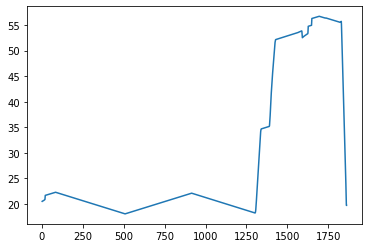

In [100]:
#f, ax= plt.subplots(1, 1, sharey=True, figsize=(10,6))
n_df = df.query("name == '805'")
n_df
plt.plot(n_df['log_order'],n_df['value'])
plt.show()